### 네이버 영화평 감성분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


아래 폰트 설치용 코드 실행하고 런타임 다시 시작할것(구글 코랩 기준)

In [ ]:
#폰트 설치용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#나눔 고딕 폰트가 존재하는지 확인 #27개이면 넘어가면 된다
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))
font_list

27


['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-B

In [ ]:
import pandas as pd

train_data = pd.read_table('/content/drive/MyDrive/텍스트 분석 개인과제/ratings_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/텍스트 분석 개인과제/ratings_test.txt')

In [ ]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력
train_data[:5] # 상위 5개 출력

훈련용 리뷰 개수 : 150000


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력
test_data[:5]

테스트용 리뷰 개수 : 50000


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
# document 열과 label 열의 중복을 제외한 값의 개수
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [ ]:
test_data['document'].nunique(), test_data['label'].nunique()

(49157, 2)

In [ ]:
# document 열 기준 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True, ignore_index=True)
# inplace=True : 원본 데이터프레임 변경
# ignore_index=True : 결과 데이터프레임의 보존 행 인덱스를 0, 1, 2, ... , n으로 재설정

train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
test_data.drop_duplicates(subset=['document'], inplace=True, ignore_index=True)
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
# Null 값 존재 확인
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
test_data = test_data.dropna(how = 'any') # Null 값이 존재하는 행 제거

In [ ]:
# Null 값 제거 후 확인
print(train_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [ ]:
# 클래스 레이블 분포 확인
train_data['label'].value_counts()

0    73342
1    72840
Name: label, dtype: int64

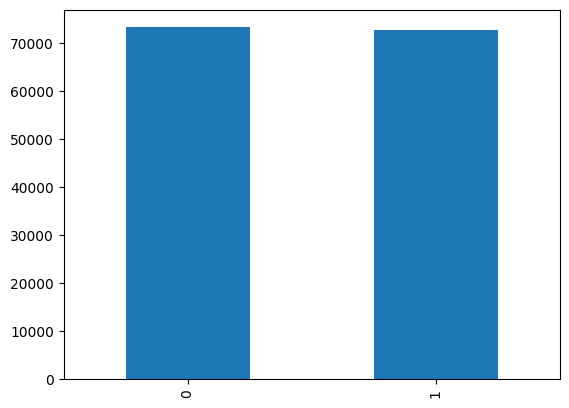

In [ ]:
# 클래스 레이블 분포 시각화
train_data['label'].value_counts().plot(kind = 'bar');

In [ ]:
print('훈련 데이터 총 샘플의 수 :',len(train_data))

훈련 데이터 총 샘플의 수 : 146182


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

##전처리: 불용어,영어, 특수문자 모두 제거

In [ ]:
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)

  # okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    # 불용어 제거
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [ ]:
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한','으로','만','적','되다','이다','를','도','을','에','영화','ㅋ','진짜','너무','완전','이거','이건','그리고','왜','이','아']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:1]

[['더빙', '짜증나다', '목소리']]

In [ ]:
#test 데이터도 동일하게 전처리
clean_test_review = []
for review in test_data['document']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])

한글 폰트가 깨지는 문제 해결
-> 첫 문단에서 폰트 설치하고 런타임 재실행
-> 아래 코드 실행하고 나눔고딕 폰트 있는지 확인

In [ ]:
#나눔 고딕 폰트가 존재하는지 확인
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))
font_list

27


['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-B

##단어빈도 그래프

[('내', 5919), ('평점', 6266), ('연기', 6326), ('나오다', 6397), ('과', 6418), ('만들다', 6507), ('에서', 6981), ('점', 7547), ('않다', 7722), ('아니다', 7753), ('로', 7834), ('같다', 8343), ('재밌다', 8802), ('정말', 9720), ('다', 10105), ('좋다', 12001), ('있다', 12429), ('없다', 15572), ('하다', 40807), ('보다', 41072)]


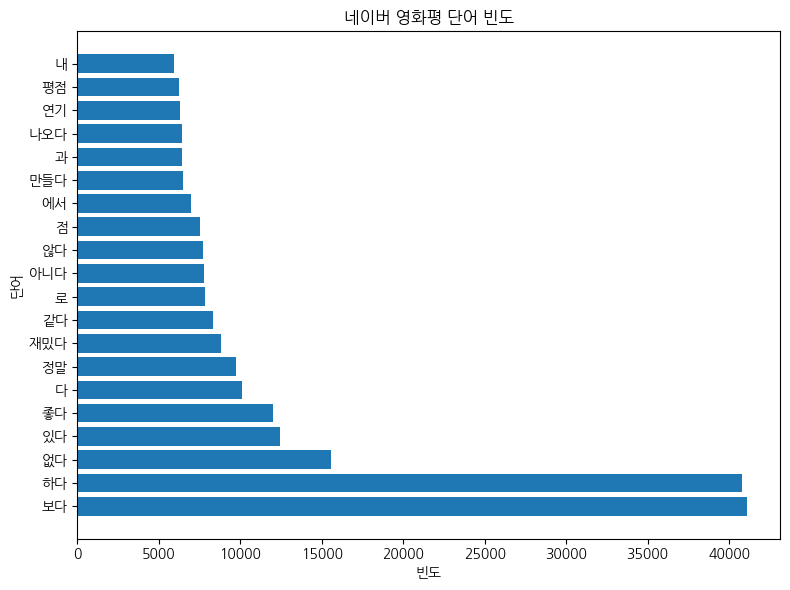

In [ ]:
#단어빈도 그래프
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = "/content/drive/MyDrive/텍스트 분석 개인과제/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프 크기 조정
plt.figure(figsize=(8, 6))

tokens_const = clean_train_review  # 예시 데이터 (리스트 형태)

const_cnt = {}
for words in tokens_const:
    for word in words:
        const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=20):
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    w, n = zip(*sorted_w[-max_words:])

    plt.barh(range(len(w)), n, tick_label=w)
    plt.xlabel('빈도')
    plt.ylabel('단어')
    plt.title('네이버 영화평 단어 빈도')
    plt.tight_layout()  # 그래프가 잘리지 않도록 자동 조정
    plt.gca().invert_yaxis()  # y축의 순서를 역순으로 변경
    plt.show()

word_graph(const_cnt, max_words=20)


In [ ]:
#문서 단어 행렬
from sklearn.feature_extraction.text import CountVectorizer

# 전처리된 텍스트 데이터
text_data = clean_train_review

# CountVectorizer를 사용하여 문서 단어 행렬 생성
vectorizer = CountVectorizer()
tokens_const = clean_train_review  # 예시 데이터 (리스트 형태)

const_cnt = {}
for words in tokens_const:
    for word in words:
        const_cnt[word] = const_cnt.get(word, 0) + 1

doc_term_matrix = vectorizer.fit_transform( const_cnt)

# 문서 단어 행렬 출력
print(doc_term_matrix.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 500 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

##워드 클라우드 생성


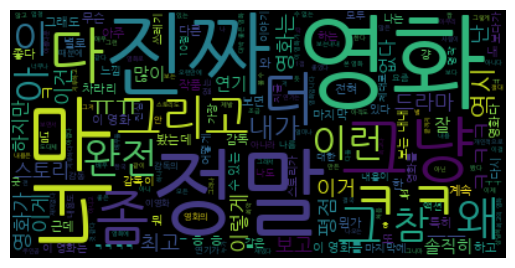

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
wordcloud = WordCloud('/content/drive/MyDrive/텍스트 분석 개인과제/NanumGothic.ttf').generate(' '.join(train_data['document']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
print('긍정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 갯수: 72840
부정 리뷰 갯수: 73342


#cnn, lstm 모델을 통해 감성분류를 실행

In [ ]:
#기본 cnn, lstm
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from konlpy.tag import Okt
from tensorflow.keras.callbacks import EarlyStopping

# LSTM 모델
model_lstm = Sequential()
model_lstm.add(LSTM(units=128, input_shape=(train_inputs.shape[1], 1)))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping 콜백
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# LSTM 모델 학습
model_lstm.fit(train_inputs, train_labels, epochs=10, batch_size=64, validation_data=(test_inputs, test_labels), callbacks=[early_stopping_lstm])

# CNN 모델
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(train_inputs.shape[1], 1)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping 콜백
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# CNN 모델 학습
model_cnn.fit(train_inputs, train_labels, epochs=10, batch_size=64, validation_data=(test_inputs, test_labels), callbacks=[early_stopping_cnn])

# 모델 성능 비교
y_pred_lstm = model_lstm.predict(test_inputs)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
accuracy_lstm = accuracy_score(test_labels, y_pred_lstm_classes)

y_pred_cnn = model_cnn.predict(test_inputs)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
accuracy_cnn = accuracy_score(test_labels, y_pred_cnn_classes)

print("LSTM Accuracy:", accuracy_lstm)
print("CNN Accuracy:", accuracy_cnn)



Epoch 1/10
2285/2285 [==============================] - 61s 24ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 2/10
2285/2285 [==============================] - 56s 25ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 3/10
2285/2285 [==============================] - 55s 24ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 4/10
2285/2285 [==============================] - 56s 24ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 5/10
2285/2285 [==============================] - 52s 23ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 1/10
2285/2285 [==============================] - 17s 6ms/step - loss: 4.5991 - accuracy: 0.5060 - val_loss: 3.1132 - val_accuracy: 0.5074
Epoch 2/10
2285/2285 [==============================] - 13s 6ms/step - loss: 2.8359 - accuracy: 0.5037 - val_loss: 3.4918 - v

##cnn, lstm 모델을 통해 감성분류를 실행하였고 성능을 개선해보기 위해
##두 모델을 합친 앙상블 cnn-lstm모델을 도입하였다.


In [ ]:
##최종 cnn,lstm, cnn-lstm

In [ ]:
#기본적인 형태의 cnn,lstm, cnn-lstm
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, concatenate
from konlpy.tag import Okt
from tensorflow.keras.callbacks import EarlyStopping
# LSTM 모델
model_lstm = Sequential()
model_lstm.add(LSTM(units=128, input_shape=(train_inputs.shape[1], 1)))

model_lstm.add(Dense(1, activation='sigmoid'))


model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping 콜백
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# LSTM 모델 학습
model_lstm.fit(train_inputs, train_labels, epochs=10, batch_size=64, validation_data=(test_inputs, test_labels), callbacks=[early_stopping_lstm])

# CNN 모델
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(train_inputs.shape[1], 1)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping 콜백
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# CNN 모델 학습
model_cnn.fit(train_inputs, train_labels, epochs=10, batch_size=64, validation_data=(test_inputs, test_labels), callbacks=[early_stopping_cnn])

# CNN-LSTM 앙상블 모델
concatenated = concatenate([model_lstm.output, model_cnn.output])
ensemble_output = Dense(1, activation='sigmoid')(concatenated)

model_ensemble = Model(inputs=[model_lstm.input, model_cnn.input], outputs=ensemble_output)
model_ensemble.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping 콜백
early_stopping_ensemble = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 앙상블 모델 학습
model_ensemble.fit([train_inputs, train_inputs], train_labels, epochs=10, batch_size=64, validation_data=([test_inputs, test_inputs], test_labels), callbacks=[early_stopping_ensemble])

# 모델 성능 비교
y_pred_lstm = model_lstm.predict(test_inputs)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
accuracy_lstm = accuracy_score(test_labels, y_pred_lstm_classes)

y_pred_cnn = model_cnn.predict(test_inputs)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
accuracy_cnn = accuracy_score(test_labels, y_pred_cnn_classes)

y_pred_ensemble = model_ensemble.predict([train_inputs, train_inputs])
y_pred_ensemble_classes = np.argmax(y_pred_ensemble, axis=1)
accuracy_ensemble = accuracy_score(train_labels, y_pred_ensemble_classes)

print("LSTM Accuracy:", accuracy_lstm)
print("CNN Accuracy:", accuracy_cnn)
print("Ensemble Accuracy:", accuracy_ensemble)

Epoch 1/10
2285/2285 [==============================] - 55s 22ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6933 - val_accuracy: 0.4973
Epoch 2/10
2285/2285 [==============================] - 54s 24ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 3/10
2285/2285 [==============================] - 55s 24ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 4/10
2285/2285 [==============================] - 55s 24ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 5/10
2285/2285 [==============================] - 55s 24ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 6/10
2285/2285 [==============================] - 60s 26ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 7/10
2285/2285 [==============================] - 58s 25ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6933 -

##cnn, lstm 개별 모델만 사용할때보다 앙상블 모형을 통한 예측이 더 정확한 것을 알 수 있다.